In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from tqdm import tqdm

data_path = r'/content/drive/MyDrive/combined_df.csv'
df = pd.read_csv(data_path)

X = df.drop(columns=['timestamp', 'label'], errors='ignore')

df_sampled = X.sample(frac=0.01, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_sampled)

Εκτέλεση KMeans:  11%|█         | 1/9 [00:55<07:20, 55.07s/K]

Silhouette Score for 2 clusters: 0.22353885399081688


Εκτέλεση KMeans:  22%|██▏       | 2/9 [01:55<06:48, 58.37s/K]

Silhouette Score for 3 clusters: 0.19111336928680903


Εκτέλεση KMeans:  33%|███▎      | 3/9 [02:50<05:40, 56.70s/K]

Silhouette Score for 4 clusters: 0.24449648141687394


Εκτέλεση KMeans:  44%|████▍     | 4/9 [03:44<04:38, 55.64s/K]

Silhouette Score for 5 clusters: 0.25447469837144143


Εκτέλεση KMeans:  56%|█████▌    | 5/9 [04:36<03:36, 54.20s/K]

Silhouette Score for 6 clusters: 0.22385068917458073


Εκτέλεση KMeans:  67%|██████▋   | 6/9 [05:29<02:41, 53.79s/K]

Silhouette Score for 7 clusters: 0.20524499546784314


Εκτέλεση KMeans:  78%|███████▊  | 7/9 [06:21<01:46, 53.19s/K]

Silhouette Score for 8 clusters: 0.21683103418451719


Εκτέλεση KMeans:  89%|████████▉ | 8/9 [07:11<00:52, 52.41s/K]

Silhouette Score for 9 clusters: 0.23564146278111997


Εκτέλεση KMeans: 100%|██████████| 9/9 [08:02<00:00, 53.61s/K]

Silhouette Score for 10 clusters: 0.23566096278363524


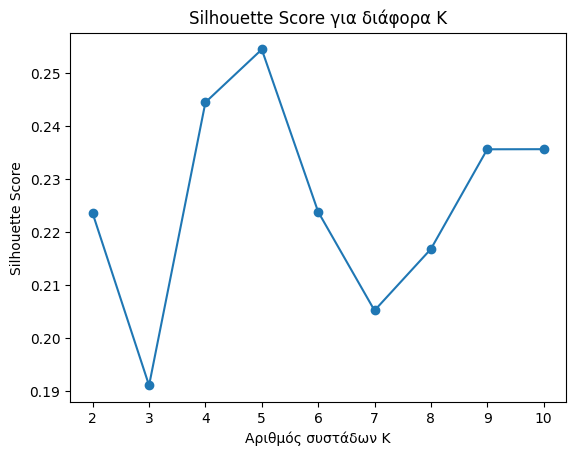

Ο βέλτιστος αριθμός συστάδων K είναι: 5


In [ ]:
# Υπολογισμός silhouette score για διάφορες τιμές του K
silhouette_scores = []
k_range = range(2, 11)  # Κοιτάμε τιμές K από 2 έως 10

for k in tqdm(k_range, desc="Εκτέλεση KMeans", unit="K"):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    score = silhouette_score(X_scaled, labels)
    print('Silhouette Score for',k,'clusters:',score)
    silhouette_scores.append(score)

plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score για διάφορα K')
plt.xlabel('Αριθμός συστάδων K')
plt.ylabel('Silhouette Score')
plt.show()

# Εύρεση του βέλτιστου K
best_k = k_range[np.argmax(silhouette_scores)]
print(f"Ο βέλτιστος αριθμός συστάδων K είναι: {best_k}")


In [ ]:
# Εκτέλεση KMeans clustering με K=5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Ετικέτες των clusters
labels = kmeans.labels_

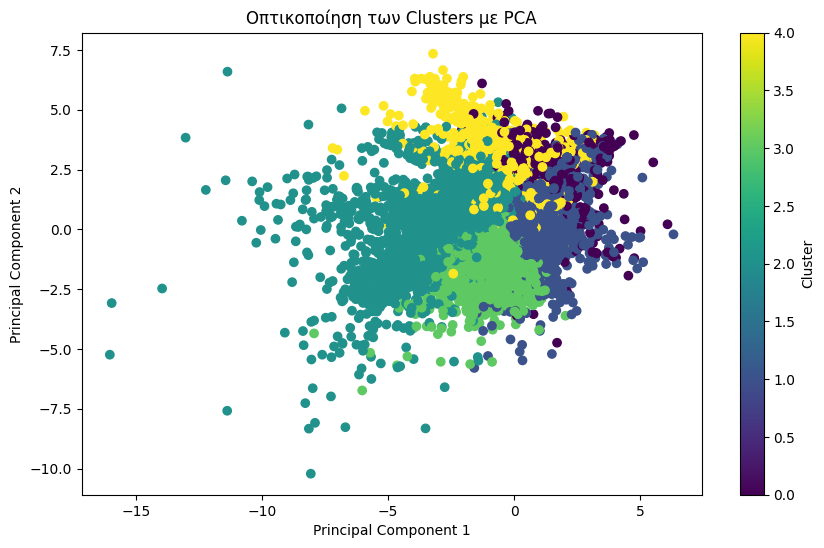

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Μείωση διαστάσεων σε 2 κύριες συνιστώσες για οπτικοποίηση
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Οπτικοποίηση των clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o')
plt.title("Οπτικοποίηση των Clusters με PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
df_sampled['Cluster'] = labels
df_sampled['label'] = df.loc[df_sampled.index, 'label']

# Δημιουργία πίνακα σύνοψης
cluster_summary = pd.crosstab(df_sampled['label'], df_sampled['Cluster'], margins=True)
print("Πίνακας Κατανομής Δραστηριοτήτων στα Clusters:")
print(cluster_summary)

Πίνακας Κατανομής Δραστηριοτήτων στα Clusters:
Cluster     0      1      2      3     4    All
label                                          
1          29    768   6070   4911   129  11907
2         286    334   1452    148   644   2864
3           2     38    604   1831     6   2481
4           0     39    312    410    14    775
5           3     40    283    273    15    614
6           1     76   2042   5324     3   7446
7          12  28494    127    201   424  29258
8        1323    851      0      2  2091   4267
13          1    211   1639   2049    62   3962
14          3     13    316    184    25    541
130         0      7    183    222     1    413
140         2      0     71     12     0     85
All      1662  30871  13099  15567  3414  64613


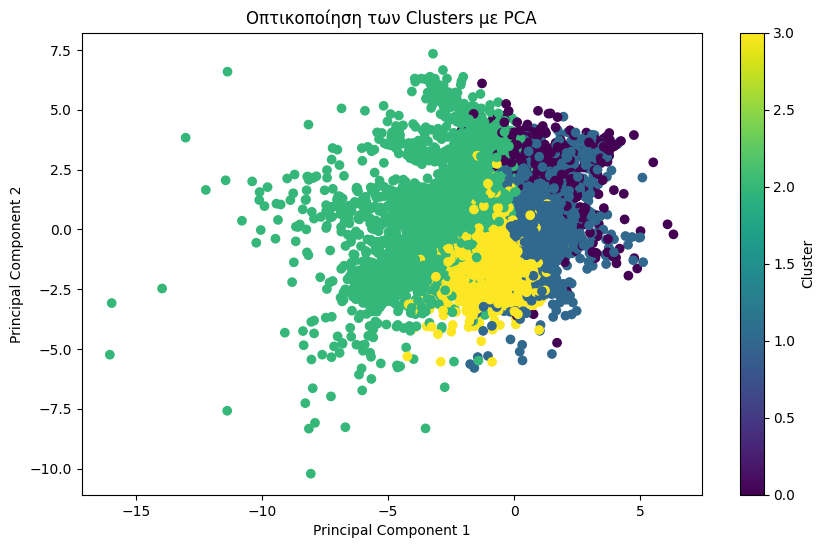

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Εκτέλεση KMeans clustering με K=4
kmeans_4 = KMeans(n_clusters=4, random_state=42)
kmeans_4.fit(X_scaled)

# Ετικέτες των clusters
labels_4 = kmeans_4.labels_

# Μείωση διαστάσεων σε 2 κύριες συνιστώσες για οπτικοποίηση
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Οπτικοποίηση των clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_4, cmap='viridis', marker='o')
plt.title("Οπτικοποίηση των Clusters με PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
# Προσθήκη των νέων ετικετών στο dataframe
df_sampled['Cluster_4'] = labels_4

# Δημιουργία πίνακα σύνοψης για K=4
df_sampled['label'] = df.loc[df_sampled.index, 'label']
cluster_summary_4 = pd.crosstab(df_sampled['label'], df_sampled['Cluster_4'], margins=True)
print("Πίνακας Κατανομής Δραστηριοτήτων στα Clusters (K=4):")
print(cluster_summary_4)

Πίνακας Κατανομής Δραστηριοτήτων στα Clusters (K=4):
Cluster_4     0      1      2      3    All
label                                      
1            39    827   5883   5158  11907
2           352    454   1851    207   2864
3             2     51    555   1873   2481
4             1     41    299    434    775
5             3     43    273    295    614
6             0    115   1793   5538   7446
7            13  28415    138    692  29258
8          1324   1754      0   1189   4267
13            1    243   1639   2079   3962
14            4     15    315    207    541
130           0      8    183    222    413
140           2      0     71     12     85
All        1741  31966  13000  17906  64613
